# Análisis de componentes principales

Para la realización de este ejercicio, nosotros decicidimos utilizar la librería de PCA del módulo de [descomposición de Sklearn.](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

### Conjunto de datos de entrada

El conjunto de datos de entrada es [europe.csv](./files/europe.csv) que se puede encontrar en la carpeta /files, el cual contiene información geográfica, social y económica de 28 países europeos.

De este conjunto de datos podemos extraer la siguiente información:
- Cantidad de variables: Esta tabla tiene 8 variables, esto incluye Nombre del país, Area, PBI, Inflación, Expectativa de vida, Militar, Crecimiento poblacional y Tasa de desempleo. **Aclaración:** El análisis de componentes principales solo opera sobre variables numéricas, con lo cual, para el ejercicio evaluaremos únicamente 7 variables, descartando los nombres de los países.
- Cantidad de registros: Esta tabla tiene 28 registros donde cada uno corresponde a un país europeo distinto.

### Evaluación de datos de entrada

Para realizar un primer acercamiento a los datos provistos por la tabla, realizaremos dos gráficos boxplot, uno evaluando los datos *crudos* como se presentan en el archivo, y luego otro con los datos estandarizados.

1) Empecemos con los datos sin estandarizar

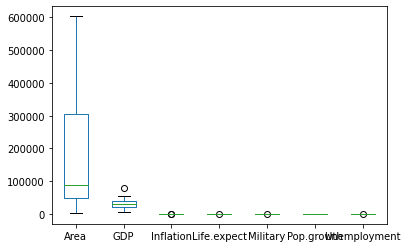

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import numpy as np

data = pd.read_csv('files/europe.csv')
features = ['Area','GDP','Inflation','Life.expect','Military','Pop.growth','Unemployment']
X_non_standarized = data[features]
X_non_standarized = pd.DataFrame(data=X_non_standarized)
X_non_standarized.plot(kind='box')
plt.show()

2) Ahora veamos el mismo gráfico pero con los datos previamente estandarizados

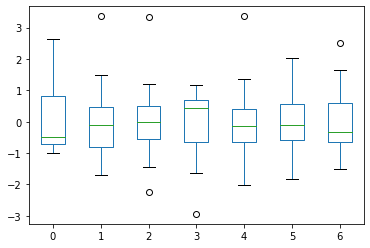

In [2]:
def standarize(grid):
    standarized_columns = []
    for i in range(len(grid[0])):    
        entire_col = [row[i] for row in grid]
        media = sum(entire_col) / len(entire_col)
        std = statistics.stdev(entire_col)
        standarized_column = [(value - media) / std for value in entire_col]
        standarized_columns.append(standarized_column)
    array = np.array([np.array(xi) for xi in standarized_columns])
    array = array.transpose()
    return array

X_standarized = data[features]
X_standarized = pd.DataFrame(data=standarize(X_standarized.to_numpy()))
X_standarized.plot(kind='box')
plt.show()


Normalizamos a partir de la siguiente fórmula:

\begin{equation*}
X_n^e = \frac{X_n - \overline{X}}{std({X})}
\end{equation*}


## Matrices de covarianza y correlaciones

Luego determinamos las matrices de covarianza y de correlaciones a partir de los datos provistos.

1) Matriz de covarianza
Es la matriz que contiene los valores de la covarianza muestral entre 2 variables, de modo que cada elemento de la matriz respeta la siguiente fórmula:

\begin{equation*}
S_i{_k} = \frac{1}{n}\sum_{j=1}^m (x_j{_i} - \overline{x_i})(x_j{_k} - \overline{x_i})
\end{equation*}

Donde:
\begin{equation*}\ S_i{_k} \gt 0\end{equation*}La asociación entre las variables es positiva .
\begin{equation*}\ S_i{_k} \lt 0\end{equation*}La asociación entre las variables es negativa.
\begin{equation*} S_i{_k} = 0\end{equation*}No hay asociación entre las variables.


In [3]:
covariance_matrix = X_non_standarized.cov()
print('Dimensión de la matriz de covarianza: ', np.shape(covariance_matrix))
print('Matriz de covarianza: \n', covariance_matrix)

Dimensión de la matriz de covarianza:  (7, 7)
Matriz de covarianza: 
                       Area           GDP     Inflation   Life.expect  \
Area          2.740305e+10 -3.325321e+08  74089.928042 -11440.558426   
GDP          -3.325321e+08  2.103114e+08  -9991.957672  32419.879630   
Inflation     7.408993e+04 -9.991958e+03      1.955132     -3.028704   
Life.expect  -1.144056e+04  3.241988e+04     -3.028704     10.170716   
Military      1.348984e+04 -3.305827e+03      0.054101     -0.161642   
Pop.growth   -7.363911e+03  5.535550e+03     -0.336021      1.235259   
Unemployment  1.970705e+04 -3.580246e+04      1.300159     -3.669574   

                  Military   Pop.growth  Unemployment  
Area          13489.839960 -7363.910635  19707.051058  
GDP           -3305.826720  5535.550265 -35802.460317  
Inflation         0.054101    -0.336021      1.300159  
Life.expect      -0.161642     1.235259     -3.669574  
Military          0.642165    -0.113575      1.095643  
Pop.growth       

2) Matriz de correlación
La matrz de correlación nos da la relación entre 2 variables, con valores comprendidos entre -1 y 1. En este caso, la forma de popular la matriz es idéntica, solo que tomando los datos de entrada ya estandarizados. Podemos observar que en este caso, la diagonal principal siempre tiene un valor de 1, representando la relación absoluta entre una variable y si misma.

In [4]:
correlations_matrix = X_standarized.corr()
print('Dimensión de la matriz de correlación: ', np.shape(correlations_matrix))
print('Matriz de correlación: \n', correlations_matrix)

Dimensión de la matriz de correlación:  (7, 7)
Matriz de correlación: 
           0         1         2         3         4         5         6
0  1.000000 -0.138517  0.320090 -0.021671  0.101691 -0.088621  0.025449
1 -0.138517  1.000000 -0.492755  0.700978 -0.284463  0.760424 -0.527756
2  0.320090 -0.492755  1.000000 -0.679193  0.048283 -0.478746  0.198774
3 -0.021671  0.700978 -0.679193  1.000000 -0.063249  0.771629 -0.245975
4  0.101691 -0.284463  0.048283 -0.063249  1.000000 -0.282347  0.292279
5 -0.088621  0.760424 -0.478746  0.771629 -0.282347  1.000000 -0.174769
6  0.025449 -0.527756  0.198774 -0.245975  0.292279 -0.174769  1.000000


## Cálculo de autovalores y autovectores

Ahora calculemos los autovalores asociados a las tablas, y sus respectivos autovectores.

\begin{equation*} \text{Recordemos que los autovalores son los } \lambda \text{ / } (A - \lambda I) \vec v =  \vec 0\end{equation*}

\begin{equation*} \text{Y los autovectores son los } \vec v \text{ asociados a esos } \lambda\end{equation*}

1) Calculamos los autovalores y autovectoers de la matriz de covarianza, ordenando los autovalores de mayor a menor.

In [5]:
eigen_values_ns, eigen_vectors_ns = np.linalg.eig(covariance_matrix)
idx_order_ns = eigen_values_ns.argsort()[::-1]
eigen_values_ns = eigen_values_ns[idx_order_ns]
eigen_vectors_ns = eigen_vectors_ns[:,idx_order_ns]
print('Autovalores: ', eigen_values_ns)
print('Autovectores: ', eigen_vectors_ns)

Autovalores:  [2.74071191e+10 2.06245544e+08 1.61367175e+01 5.36835095e+00
 7.77196831e-01 5.58578271e-01 5.81146240e-02]
Autovectores:  [[-9.99925260e-01 -1.22259664e-02 -1.15907007e-06  8.76398393e-07
  -2.55643002e-06 -4.76693481e-07 -8.23249955e-08]
 [ 1.22259664e-02 -9.99925232e-01 -1.39237702e-04  1.91123837e-04
  -2.04259624e-05  2.09914170e-05  1.77027887e-05]
 [-2.70756484e-06  4.40513295e-05  4.07576923e-02  3.47331165e-01
   9.32437955e-01  8.17542177e-02  3.96935686e-02]
 [ 4.31861069e-07 -1.56500769e-04 -1.77866306e-01 -9.16473235e-01
   3.47617660e-01 -2.32240281e-02  8.40414667e-02]
 [-4.93639942e-07  1.52277397e-05 -3.84545055e-02 -5.18473040e-02
  -6.03896767e-02  9.88353166e-01 -1.23871768e-01]
 [ 2.71135309e-07 -2.64010831e-05 -3.70396563e-02 -5.22010104e-02
   7.39244808e-02 -1.23430438e-01 -9.87523780e-01]
 [-7.34965897e-07  1.72410271e-04 -9.81759483e-01  1.84457978e-01
  -2.46917191e-02 -2.64544720e-02  2.85310608e-02]]


2) Ahora hacemos el mismo procedimiento para los autovalores y autovectores de la matriz de correlación.

In [6]:
eigen_values_s, eigen_vectors_s = np.linalg.eig(correlations_matrix)
idx_order_s = eigen_values_s.argsort()[::-1]
eigen_values_s = eigen_values_s[idx_order_s]
eigen_vectors_s = eigen_vectors_s[:,idx_order_s]
print('Autovalores: ', eigen_values_s)
print('Autovectores: ', eigen_vectors_s)

Autovalores:  [3.22716568 1.18712341 1.06319053 0.77035598 0.45784862 0.16867389
 0.12564189]
Autovectores:  [[-1.24873902e-01  1.72872202e-01  8.98296740e-01  4.48503976e-02
  -3.24016926e-01  1.90118083e-01 -6.66428246e-02]
 [ 5.00505858e-01  1.30139553e-01  8.39557607e-02 -8.42554739e-02
   3.90632444e-01  6.38657073e-01  3.97408435e-01]
 [-4.06518155e-01  3.69657243e-01  1.98194675e-01  1.64685649e-01
   6.89500539e-01 -3.23867263e-01  2.26700295e-01]
 [ 4.82873325e-01 -2.65247797e-01  2.46082460e-01  2.67714373e-02
  -1.01786561e-01 -6.06434187e-01  5.07031305e-01]
 [-1.88111616e-01 -6.58266888e-01  2.43679433e-01 -5.62374796e-01
   3.68147581e-01  3.55960680e-02 -1.37309597e-01]
 [ 4.75703554e-01 -8.26219831e-02  1.63697207e-01  3.92462767e-01
   3.47867772e-01 -1.20855625e-01 -6.71146682e-01]
 [-2.71655820e-01 -5.53203705e-01  5.00135736e-04  7.01967912e-01
   1.01587422e-02  2.59704965e-01  2.44662434e-01]]


## Análisis de componenetes principales

Ahora utilizaremos la librería de PCA de descomposición de Sklearn como dijimos previamente y analizaremos los resultados obtenidos.

1) Realizamos el análisis PCA sobre los datos sin estandarizar.

In [7]:
from sklearn.decomposition import PCA
import plotly.express as px

pca_ns = PCA()
main_components_ns = pca_ns.fit_transform(X_non_standarized)
loadings_ns = pca_ns.components_.T * np.sqrt(pca_ns.explained_variance_)
fig = px.scatter(main_components_ns, x=0, y=1, color=data["Country"])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings_ns[i, 0],
        y1=loadings_ns[i, 1]
    )
    fig.add_annotation(
        x=loadings_ns[i, 0],
        y=loadings_ns[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

2) Ahora realizamos el mismo análisis pero sobre los datos estandarizados

In [8]:
pca_s = PCA()
main_components_s = pca_s.fit_transform(X_standarized)
loadings_s = pca_s.components_.T * np.sqrt(pca_s.explained_variance_)
fig = px.scatter(main_components_s, x=0, y=1, color=data["Country"])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings_s[i, 0],
        y1=loadings_s[i, 1]
    )
    fig.add_annotation(
        x=loadings_s[i, 0],
        y=loadings_s[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

## Análisis de la componente principal

Si extraemos la componente principal de cada conjunto evaluado podemos sacar algunas conclusiones.

1) Componente principal de datos no estandarizados

In [9]:
import operator
names = list(data['Country'])
y1_ns = pca_ns.fit_transform(X_non_standarized)[:,0]
names_and_y1_ns = {}
for i in range(len(y1_ns)):
    names_and_y1_ns[names[i]] = y1_ns[i]
print('Valores de Y1 por país:\n', names_and_y1_ns)
print('\n"Mejor" país según ésta primer componente principal: ', max(names_and_y1_ns.items(), key=operator.itemgetter(1))[0])
print('\nCargas de Y1:', pca_ns.components_[0])
print('\nY1 aporta el ', pca_ns.explained_variance_ratio_[0] * 100, '% de información')

Valores de Y1 por país:
 {'Austria': -82664.43800388841, 'Belgium': -135956.99247706385, 'Bulgaria': -55318.57470325933, 'Croatia': -109650.8665058852, 'Czech Republic': -87490.78749184545, 'Denmark': -123382.15088818765, 'Estonia': -121045.3593268569, 'Finland': 171659.02299140056, 'Germany': 190508.9375923239, 'Greece': -34394.97465062543, 'Hungary': -73239.15112714349, 'Iceland': -63494.076818718575, 'Ireland': -96251.64091260199, 'Italy': 134924.01660785018, 'Latvia': -101641.79288895376, 'Lithuania': -100958.9657520614, 'Luxembourg': -164420.1754594505, 'Netherlands': -124994.1648021761, 'Norway': 157104.3631609213, 'Poland': 146394.09614674986, 'Portugal': -74223.53969418468, 'Slovakia': -117274.09916859465, 'Slovenia': -146101.19232123005, 'Spain': 338938.7674311825, 'Sweden': 283743.17886450706, 'Switzerland': -125290.7098448438, 'Ukraine': 437396.2944922998, 'United Kingdom': 77124.97555033618}

"Mejor" país según ésta primer componente principal:  Ukraine

Cargas de Y1: [ 9.9

2) Ahora evaluamos lo mismo para los datos estandarizados

In [10]:
y1_s = pca_s.fit_transform(X_standarized)[:,0]
names_and_y1_s = {}
for i in range(len(y1_s)):
    names_and_y1_s[names[i]] = y1_s[i]
print('Valores de Y1 por país:\n', names_and_y1_s)
print('\n"Mejor" país según ésta primer componente principal: ', max(names_and_y1_s.items(), key=operator.itemgetter(1))[0])
print('\nCargas de Y1: ', pca_s.components_[0])
print('\nY1 aporta el ', pca_s.explained_variance_ratio_[0] * 100, '% de información')

Valores de Y1 por país:
 {'Austria': -1.062255115785943, 'Belgium': -0.6688210981928605, 'Bulgaria': 2.5628501209089847, 'Croatia': 1.2472614091083405, 'Czech Republic': -0.1641964633307718, 'Denmark': -0.9379787423315349, 'Estonia': 2.442907488422047, 'Finland': -0.20676891484377607, 'Germany': -0.58171901908668, 'Greece': 0.9824439585763942, 'Hungary': 1.3717269121041213, 'Iceland': -1.5551818748850332, 'Ireland': -1.7763218310144777, 'Italy': -0.8378492983766787, 'Latvia': 2.264505385059275, 'Lithuania': 1.5025282839007286, 'Luxembourg': -3.415755319088453, 'Netherlands': -1.8068965738969471, 'Norway': -2.0685525744091082, 'Poland': 1.4452532080639944, 'Portugal': 0.5170061914939632, 'Slovakia': 0.7688573205118819, 'Slovenia': 0.06632627793932264, 'Spain': -0.16081595915779962, 'Sweden': -0.8691561598899682, 'Switzerland': -3.222453607460654, 'Ukraine': 4.497733954105657, 'United Kingdom': -0.33467795844402276}

"Mejor" país según ésta primer componente principal:  Ukraine

Cargas d